In [1]:
# Machine Learning Models

"""
__author__ = "Ojok Emmanuel Nsubuga"
_summary_
Accuracy score alogrithm
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Support Vector Machine (SVM)
4. Naive Bayes -Guasian Naive Bayes (GaussianNB)
5. Decision Tree
6. Random Forest
5. Confusion Matrices 
"""

'\n__author__ = "Ojok Emmanuel Nsubuga"\n_summary_\nAccuracy score alogrithm\n1. Logistic Regression\n2. K-Nearest Neighbors (KNN)\n3. Support Vector Machine (SVM)\n4. Naive Bayes -Guasian Naive Bayes (GaussianNB)\n5. Decision Tree\n6. Random Forest\n5. Confusion Matrices \n'

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML for Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# control display
pd.options.display.max_columns = 50
sns.set(style="darkgrid", rc={"axes.facecolor": "#DCDCDC"})

# import warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load / read dataset
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
"""_SUMMARY_
cp: chest pain type
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
thalach: maximum heart rate achieved
ca: number of major vessels (0-3) colored by flourosopy
target: 1 or 0
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


"""

In [4]:
# Logistic Regression
# Predict one or more possible outcomes (Usually represented by 0 or 1)
# column target

df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
# Get the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


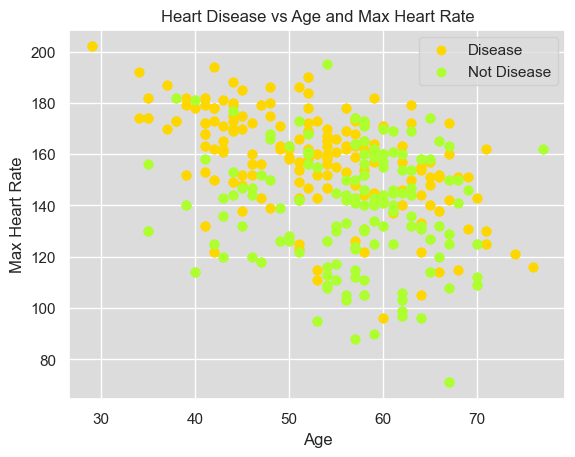

In [8]:
# Create a scatter plot for Heart Diseases vs Age and Max Heart Rate
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="#FFD700",label="Disease")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="#ADFF2F",label="Not Disease")

# Add  a legend
plt.legend()

# Add labels
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

# Set the title
plt.title("Heart Disease vs Age and Max Heart Rate")

# show the plot
plt.show()

In [9]:
# Create a Logistic Regression
# Help to solve problems with classification 
# Create the independent variable  and dependent variable 

y = df.target.values
x_data = df.drop(['target'], axis=1)

In [11]:
# Normalize the data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [12]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# Transpose the matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T


In [16]:
# get the accuracy using the Logistic Regression
# Getting the test accuracy

accuracies = {}

lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)

acc = lr.score(x_test.T,y_test.T)*100
accuracies['LogisticRegression'] = acc 

# Get output

print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 72.68%


In [18]:
# First we need to import the K-Nearst Neighbors Classifier
# get accuracy of K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2) # n_neighbors means k

knn.fit(x_train.T, y_train.T)

prediction = knn.predict(x_test.T)

# get output display

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 95.12%


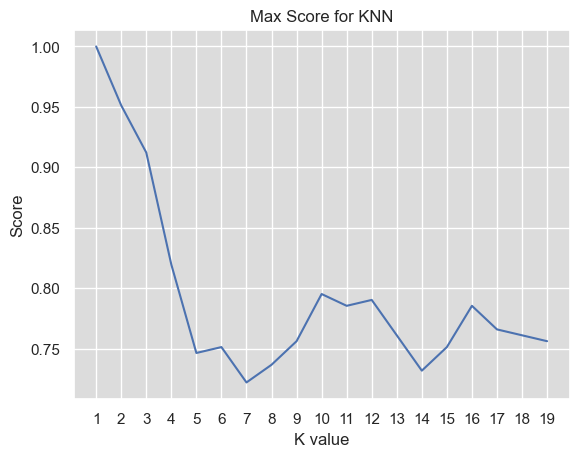

Maximum KNN Score is 100.00%


In [19]:
# Get Maximum KNN score
score_list = []

for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i) # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Show using Line Plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("Max KNN score model")
plt.show()

# get maximum score for KNN in percentage

acc = max(score_list)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [20]:
# Get Test Accuracy using Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM algorithm: 74.63%


In [21]:
# Accuracy using Naive Bayes -Guasian Naive Bayes (GaussianNB)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc

print("Accuracy of Naive Bayes: {:.2f}%".format(acc))


Accuracy of Naive Bayes: 85.37%


In [23]:
# Get accuracy using decision tree model

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T,y_test.T)*100
accuracies['Decision Tree'] = acc

print("Decision Tree Test Accuracy: {:.2f}%".format(acc))


Decision Tree Test Accuracy: 100.00%


In [25]:
# Get accuracy of Random Forest Classification algorithm

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc

print("Random Forest Accuracy Score: {:.2f}%".format(acc))

Random Forest Accuracy Score: 100.00%


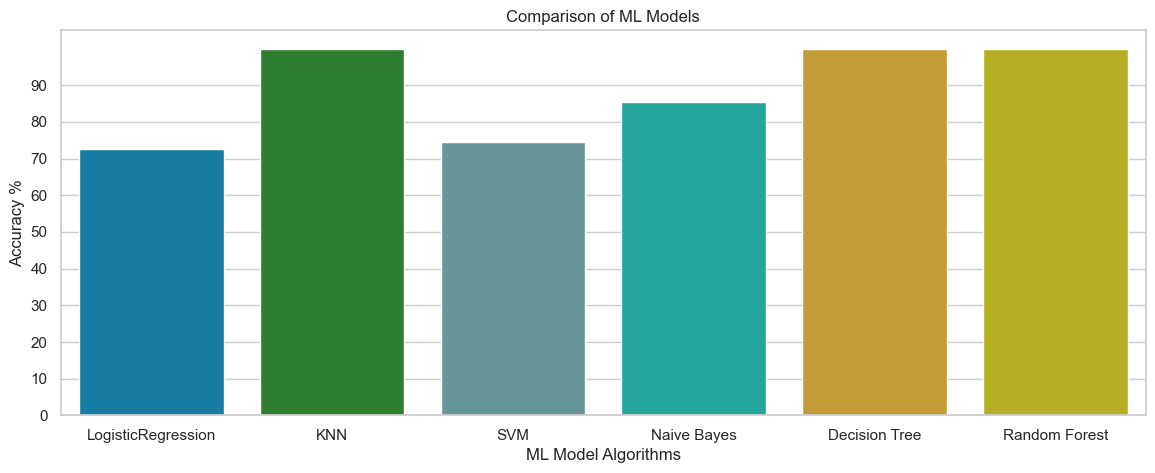

In [26]:
# compare the accuracies of the models using barplot from sns

colors = ["#0088BB","#228B22","#5F9EA0","#0FBBAE","#DAA520","#CFC60E"]
sns.set_style("whitegrid")

plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.title("Comparison of ML Models")
plt.ylabel("Accuracy %")
plt.xlabel("ML Model Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
# ML Confusion Matrix
# Evaluates the performance of a classification model
"""_SUMMARY_
True Positive (TP): Observation is positive, and is predicted to be positive.
False Negative (FN): Observation is positive, but is predicted negative.
True Negative (TN): Observation is negative, and is predicted to be negative.
False Positive (FP): Observation is positive, but is predicted negative.

ROC Curve and AUC: ROC (Receiver Operating Characteristic) Curve tells us 
about how good the model can distinguish between two things
 (e.g If a patient has a disease or no). 
 AUC (Area Under the Curve) is the percentage of the ROC plot that is underneath the curve. 
AUC is useful as a single number summary of classifier performance.
"""

In [27]:
# Get confusion Matrices to look at the imbalanced dataset
# Predicted values
y_head_lr = lr.predict(x_test.T)

knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train.T, y_train.T)
y_head_knn = knn3.predict(x_test.T)

y_head_svm = svm.predict(x_test.T)

y_head_nb = nb.predict(x_test.T)

y_head_dtc = dtc.predict(x_test.T)

y_head_rf = rf.predict(x_test.T)


In [28]:
# import modules for confusion matrix

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


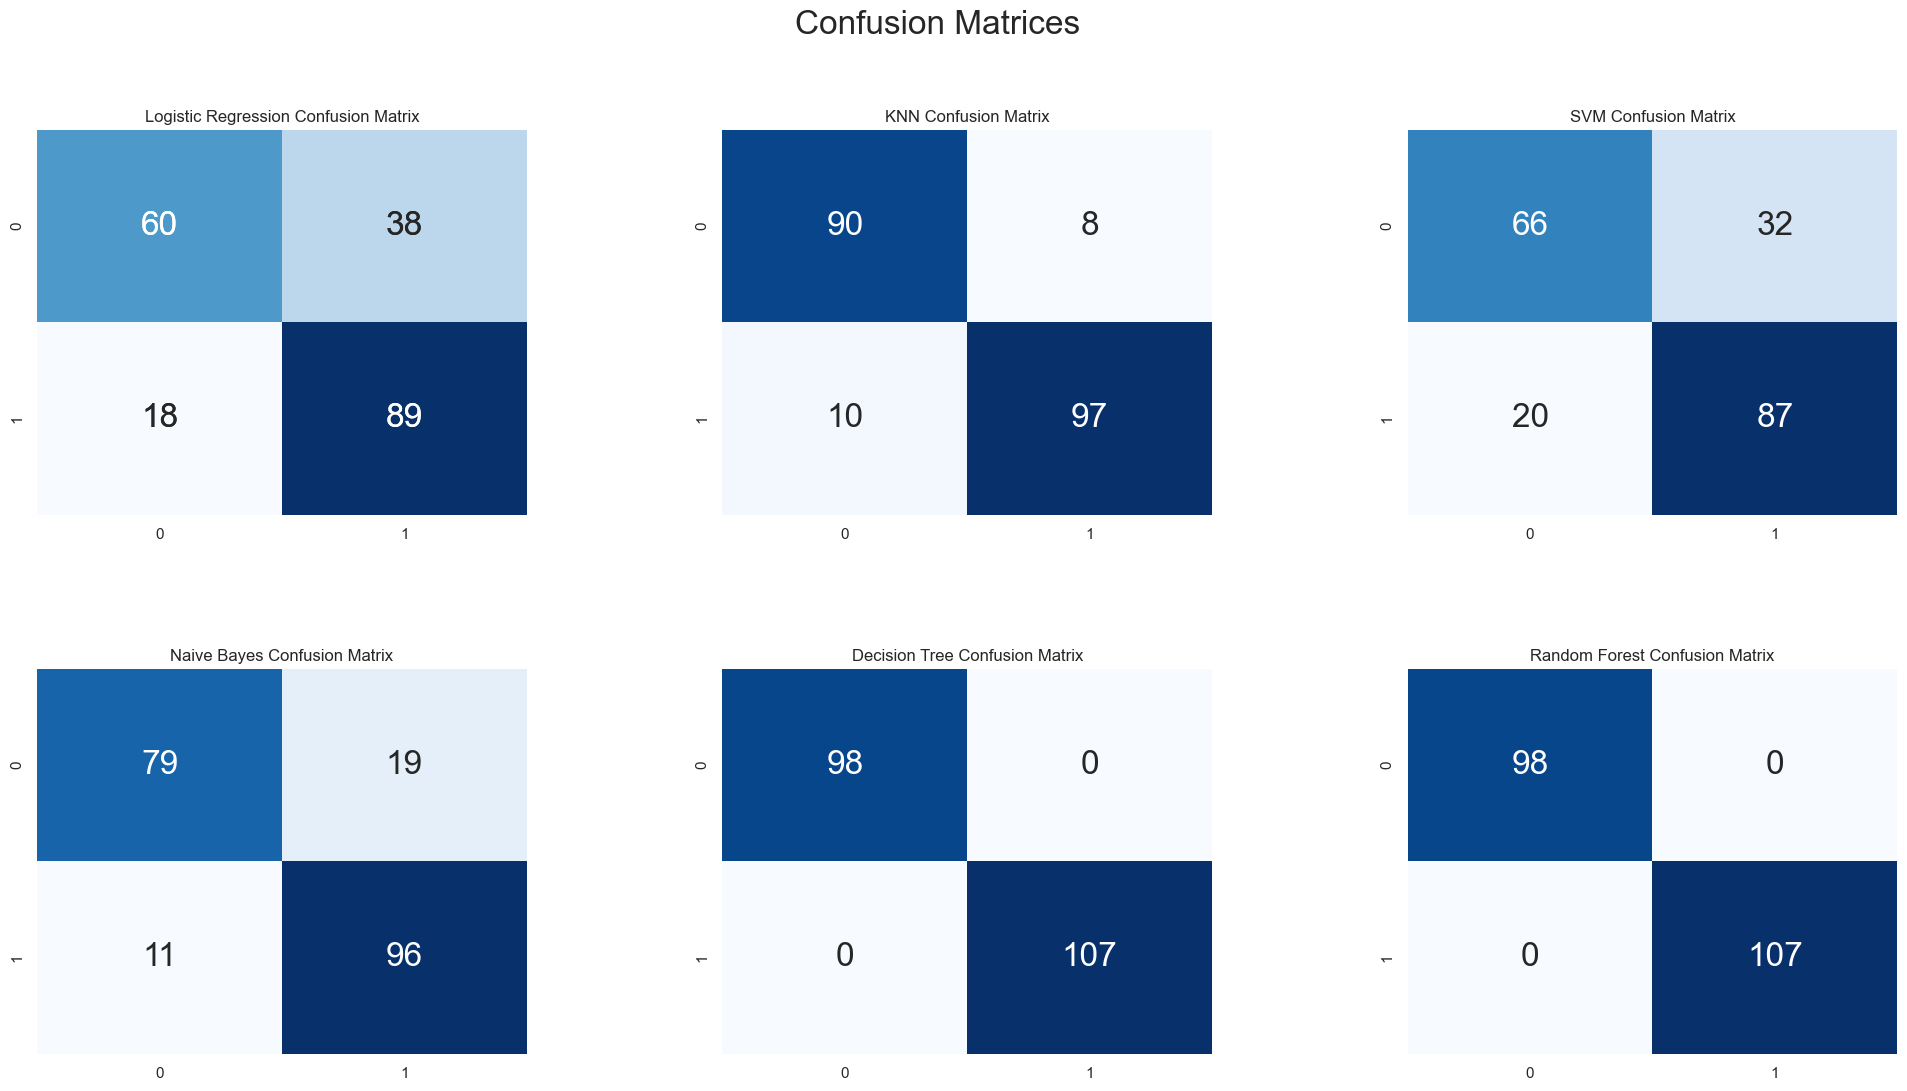

In [40]:
# Ploting confusion matrices using heat map

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

# Heatmap for Logistic Regression
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

# Heatmap for Logistic Regression
plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
sns.heatmap(cm_lr,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

# Heatmap for KNN
plt.subplot(2,3,2)
plt.title("KNN Confusion Matrix",fontsize=12)
sns.heatmap(cm_knn,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

# Heatmap for SVM
plt.subplot(2,3,3)
plt.title("SVM Confusion Matrix",fontsize=12)
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

# Heatmap for Naive Bayes
plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix",fontsize=12)
sns.heatmap(cm_nb,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

# Heatmap for Decision Tree
plt.subplot(2,3,5)
plt.title("Decision Tree Confusion Matrix",fontsize=12)
sns.heatmap(cm_dtc,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

# Heatmap for Random Forest
plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix",fontsize=12)
sns.heatmap(cm_rf,cbar=False,annot=True,cmap="Blues",fmt="d",annot_kws={"size": 24})

plt.show()


In [ ]:
"""
The confusion matrix allows us to understand well how well the model 
is performing and identify specific areas of improvement,
especially when it comes to dealing with imbalanced datasets or
when different types of errors have different costs or consequences.
"""